# House-Prices-Prediction 
Author : Jialiang Shi

## Description

* With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Goal
* For each Id in the test set, predict the value of the SalePrice variable. 

## Evaluation Critera
* Results are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')

# Overview

### Attributes Overview

In [29]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
print('Quantitative\n',quantitative,'\n')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print('Categorical\n',qualitative,'\n')

Quantitative
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Categorical
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFini

### Missing data

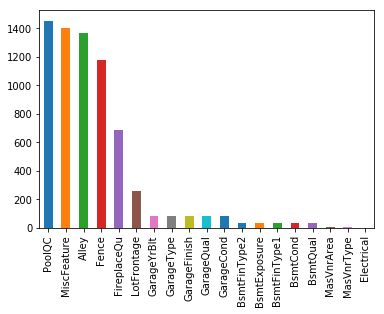

In [27]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True,ascending=False)
missing.plot.bar()

### Price Overview

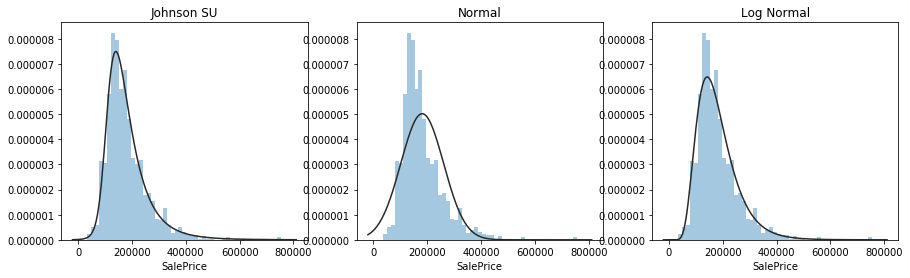

In [38]:
import scipy.stats as st
y = train['SalePrice']

plt.figure(figsize=(15,4));
plt.subplot(131); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.subplot(132); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.subplot(133); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)